# Intro to data visualization and graphical grammars

:::{panels}

**Lecture learning goals**
^^^

1. Explain the importance of data visualization.
2. Explain what constitutes a grammar of graphics.
3. Create point and line visualizations in ggplot/Altair.
4. Transform data directly in ggplot/Altair instead of dplyr/pandas.
5. Combine geometric marks via layering.

---

**Required activities**
^^^

Before class:

- Nothing!

After class:

- These lecture notes.
- [Data Visualization: A practical introduction](https://socviz.co/lookatdata.html#lookatdata)
  by Kieran Healy, Section 1 - 1.2
  (i.e. you stop when you reach 1.3)
  [OR this video on the same topic](https://www.youtube.com/watch?v=wHrzsO564uA&t=1143s)
  until the "Perception" slide ~27 min.

:::

## Data visualization concepts and importance

### What is data visualization?

At its core,
data visualization is about representing numbers with graphical elements
such as the position of a line, the length of a bar, or the colour of a point.
We often use visualizations to explore data ourselves,
and to effectively communicate our insights to others,
as we will learn in later modules of this course.

### What is the purpose of visualizing data?

We often visualize data in order to help us answer a specific question
we have about our dataset,
but it can also help us generate new questions.

Before creating a visualization,
it is important that you
think about why you are making it,
and what you want to achieve from creating this plot.
Is there a specific question you are trying to answer,
like comparing the relationship between two dataframe columns?
Or are you creating a plot
to help you understand the structure of your data more in general,
such as plotting the distribution of each dataframe column?

In either case,
it can be extremely helpful to draw out your plot with pen and paper first.
This helps you think about if the plot you are creating makes sense
or if there is another plot better suited for the task at hand.
Drawing with pen and paper also makes it easier to write the code afterwards,
since you clearly know what you are expecting
the visualization to look like.

### Why bother visualizing data instead of showing raw numbers?

To understand why visualizations are so powerful,
it is helpful to remember that to answer a question,
we often have to put the data in a format that is easy for us humans to interpret.
Because our number systems have only been around for about 5,000 years,
we need to assert effort and train ourselves
to recognize structure in numerical data.

Visual systems,
on the other hand,
have undergone refinement during 500,000,000 years of evolution,
so we can instinctively recognize visual patterns
and accurately estimate visual properties
such as colours and distances.

Practically,
this means that we can arrive at correct conclusions faster
from studying visual rather than numerical
representations of the same data.
For example, have a look at the
four sets of numbers in the table on the slide.
Can you see the differences in the general trends between these four sets of numbers?
This is a slightly modified version of the original,
<a href="https://en.wikipedia.org/wiki/Anscombe%27s_quartet" target="_blank">which was put together by statistician Francis Anscombe in the
70s.</a>

In [ ]:
import altair as alt
import pandas as pd
from vega_datasets import data
from IPython.display import display_html


anscombe = data.anscombe()
anscombe['Set'] = anscombe['Series'].map({'I': 'A', 'II': 'B', 'III': 'C', 'IV': 'D'})
anscombe = anscombe.drop(columns='Series')
anscombe.loc[anscombe['Y'] == anscombe['Y'].max(), 'Y'] = 8.5

s = ''
for set_name, df in anscombe.groupby('Set'):
    df = df.drop(columns='Set')
    df.columns = pd.MultiIndex.from_tuples([(set_name, 'X'), (set_name, 'Y')])
    space = "\xa0" * 10
    s = s + (
        df
        .style
        .set_table_attributes("style='display:inline'")
        .set_table_styles([{'selector': 'th.col_heading', 'props': 'text-align: center;'}])
        .format('{:.2f}')
        .hide_index()
        ._repr_html_()
         + space
    )
display_html(s, raw=True)

/tmp/ipykernel_220513/2537967094.py:23: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  .hide_index()
/tmp/ipykernel_220513/2537967094.py:23: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  .hide_index()
/tmp/ipykernel_220513/2537967094.py:23: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  .hide_index()
/tmp/ipykernel_220513/2537967094.py:23: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  .hide_index()


A 
 
 
 X 
 Y 
 
 
 
 
 10.00 
 8.04 
 
 
 8.00 
 6.95 
 
 
 13.00 
 7.58 
 
 
 9.00 
 8.81 
 
 
 11.00 
 8.33 
 
 
 14.00 
 9.96 
 
 
 6.00 
 7.24 
 
 
 4.00 
 4.26 
 
 
 12.00 
 10.84 
 
 
 7.00 
 4.81 
 
 
 5.00 
 5.68 
 
 
 
          
 
 
 
 B 
 
 
 X 
 Y 
 
 
 
 
 10.00 
 9.14 
 
 
 8.00 
 8.14 
 
 
 13.00 
 8.74 
 
 
 9.00 
 8.77 
 
 
 11.00 
 9.26 
 
 
 14.00 
 8.10 
 
 
 6.00 
 6.13 
 
 
 4.00 
 3.10 
 
 
 12.00 
 9.13 
 
 
 7.00 
 7.26 
 
 
 5.00 
 4.74 
 
 
 
          
 
 
 
 C 
 
 
 X 
 Y 
 
 
 
 
 10.00 
 7.46 
 
 
 8.00 
 6.77 
 
 
 13.00 
 8.50 
 
 
 9.00 
 7.11 
 
 
 11.00 
 7.81 
 
 
 14.00 
 8.84 
 
 
 6.00 
 6.08 
 
 
 4.00 
 5.39 
 
 
 12.00 
 8.15 
 
 
 7.00 
 6.42 
 
 
 5.00 
 5.73 
 
 
 
          
 
 
 
 D 
 
 
 X 
 Y 
 
 
 
 
 8.00 
 6.58 
 
 
 8.00 
 5.76 
 
 
 8.00 
 7.71 
 
 
 8.00 
 8.84 
 
 
 8.00 
 8.47 
 
 
 8.00 
 7.04 
 
 
 8.00 
 5.25 
 
 
 19.00 
 12.50 
 
 
 8.00 
 5.56 
 
 
 8.00 
 7.91 
 
 
 8.00 
 6.89

#### Summary statistics don't tell the whole story

You are likely not able to see much difference between the data sets
in the table above.
What about if I showed you a few commonly used numerical summaries of the data?

In [ ]:
s = ''
for set_name, df in anscombe.groupby('Set'):
    df = df.drop(columns='Set')
    df.columns = pd.MultiIndex.from_tuples([(set_name, 'X'), (set_name, 'Y')])
    s += (
        df
        .agg(['mean', 'std'])
        .round(2)
        .style
        .format('{:.2f}')
        .set_table_attributes("style='display:inline'")
        .set_table_styles([{'selector': 'th.col_heading', 'props': 'text-align: center;'}])
        .hide_index()
        ._repr_html_()
        .replace('>7.11',  ' style="background-color:#4853a4; color:#ffffff"> <b>7.11</b>')
        .replace('>1.15',  ' style="background-color:#4853a4; color:#ffffff"> <b>1.15</b>')
         + space
    )
display_html(s, raw=True)

/tmp/ipykernel_220513/2431933811.py:13: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  .hide_index()
/tmp/ipykernel_220513/2431933811.py:13: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  .hide_index()
/tmp/ipykernel_220513/2431933811.py:13: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  .hide_index()
/tmp/ipykernel_220513/2431933811.py:13: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  .hide_index()


A 
 
 
 X 
 Y 
 
 
 
 
 9.00 
 7.50 
 
 
 3.32 
 2.03 
 
 
 
          
 
 
 
 B 
 
 
 X 
 Y 
 
 
 
 
 9.00 
 7.50 
 
 
 3.32 
 2.03 
 
 
 
          
 
 
 
 C 
 
 
 X 
 Y 
 
 
 
 
 9.00 
 7.11 
 
 
 3.32 
 1.15 
 
 
 
          
 
 
 
 D 
 
 
 X 
 Y 
 
 
 
 
 9.00 
 7.50 
 
 
 3.32 
 2.03

Summaries,
such as the mean and standard deviation,
are helpful statistical tools
that are often useful for detecting the differences between datasets.
However,
since they collapse the data into just a few numbers,
statistical summaries can't tell the whole story about the data
and there can be important differences between datasets
that summaries fail to reveal.

Below,
the mean and standard deviation indicate that set C
is slightly different from the other sets of data
in terms of the centre of the sample distribution and the spread of that distribution,
while the remaining three sets of data have a similar centre and spread.

#### Plotting the data immediately reveals patterns in the data 

So if you can't really see any patterns in the data
and the statistical summaries are the same,
that must mean that the four sets are pretty similar, right?
Sounds about right to me so let's go ahead and plot them to have a quick look and...

In [ ]:
# Make plot elements easier to see
# This is a bit ugly but there is no faster why,
# maybe we should discuss if we want this in all slide decks
# or just go with the default smaller font.
def bigger_font():
    return {
        'config': {
            'view': {'continuousWidth': 400, 'continuousHeight': 300},
            'legend': {'symbolSize': 14, 'titleFontSize': 14, 'labelFontSize': 14},
            'axis': {'titleFontSize': 14, 'labelFontSize': 12},
            'header': {'titleFontSize': 16, 'labelFontSize': 14},
            'encoding': {'x': {'scale': {'zero': False}}}}}
alt.themes.register('bigger_font', bigger_font)
alt.themes.enable('bigger_font')
(alt.Chart(anscombe).mark_circle(size=80, opacity=1).encode(
    x='X',
    y='Y')
 .properties(width=300, height=200)
 .facet('Set', columns=2)
 .configure_axis(grid=True)
 .configure_header(title=None)
)

alt.FacetChart(...)

... what the... how... there must be something wrong, right?
Well what is wrong is that humans are not good at detecting patterns in raw numbers,
and we don't have good intuition about which combination of numbers can contribute to the same statistical summaries.
But guess what we excel at? Detecting visual patterns!

It is immediately clear to us how these sets of numbers differ
once they are shown as graphical objects 
instead of textual objects.
We could not detect these patterns from only looking at the raw numbers or summary statistics
This is one of the main reasons why data visualization
is such a powerful tool for data exploration and communication.

In our example here,
we would come to widely different conclusions about the behaviour of the data
for the four different data sets.

Sets A and C are roughly linearly increasing at similar rates,
whereas set B reaches a plateau and starts to drop,
and set D has a constant X-value for all numbers except one big outlier.

#### A modern take on Anscombe's quartet

For a more recent, dynamic, and avian illustration
of how graphical representations are much easier for us to interpret,
check out the [Datasaurus Dozen animation](https://www.autodesk.com/research/publications/same-stats-different-graphs) below.
It displays several different datasets,
all with the same mean, standard deviation and correlation between X and Y,
but looking at the data graphically shows us how different these datasets actually are.

:::{margin} Factual tidbit

Birds evolved from dinosaurs,
and many of the more recent two-legged [dinosaurs were covered in feathers and fuzz](https://en.wikipedia.org/wiki/Feathered_dinosaur)
looking nothing like the scaly beasts they are popularly depicted as.

![](https://i.kinja-img.com/gawker-media/image/upload/c_fit,f_auto,g_center,pg_1,q_60,w_965/813266302148042132.jpg)

:::

![](https://blog.revolutionanalytics.com/downloads/DataSaurus%20Dozen.gif)

### A word of caution

As with most powerful tools,
visualization can be dangerous if wielded the wrong way.
It can cause misinterpretations of the data,
where the person creating the visualization
has not taken into account how the human visual cortex
will process a particular plot
or (rarely) actively tries to mislead readers
by manipulating our intuition.

To guard against both these issues,
it is important that we know what common visualization traps
we might encounter in the wild.
This has been written about extensively,
and one good introduction is the book
[Data Visualization: A practical introduction](https://socviz.co/lookatdata.html#lookatdata) by Kieran Healy, Section 1 - 1.2
(to be clear this notation means that the entire 1.2 section is included,
so you stop when you reach the 1.3 section).

He starts discussing some of the things we mentioned above,
but in more detail
and also covers visualization mistakes.
Please go ahead and read his sections,
or [or his video on the same topic](https://www.youtube.com/watch?v=wHrzsO564uA&t=1143s) until the "Perception" slide around minute 27.
The key takeaways are the general design considerations
that goes into visualizing data,
so you don't have to bother remembering minute details,
such as which boxplot was Edward Tufte's favorite.

After you have read/watched the above,
continue to the next section below.

## Creating plots in R and Python

There is a plethora of visualization tools in each language,
here is a brief overview.

### The R and Python visualization landscapes

<!-- 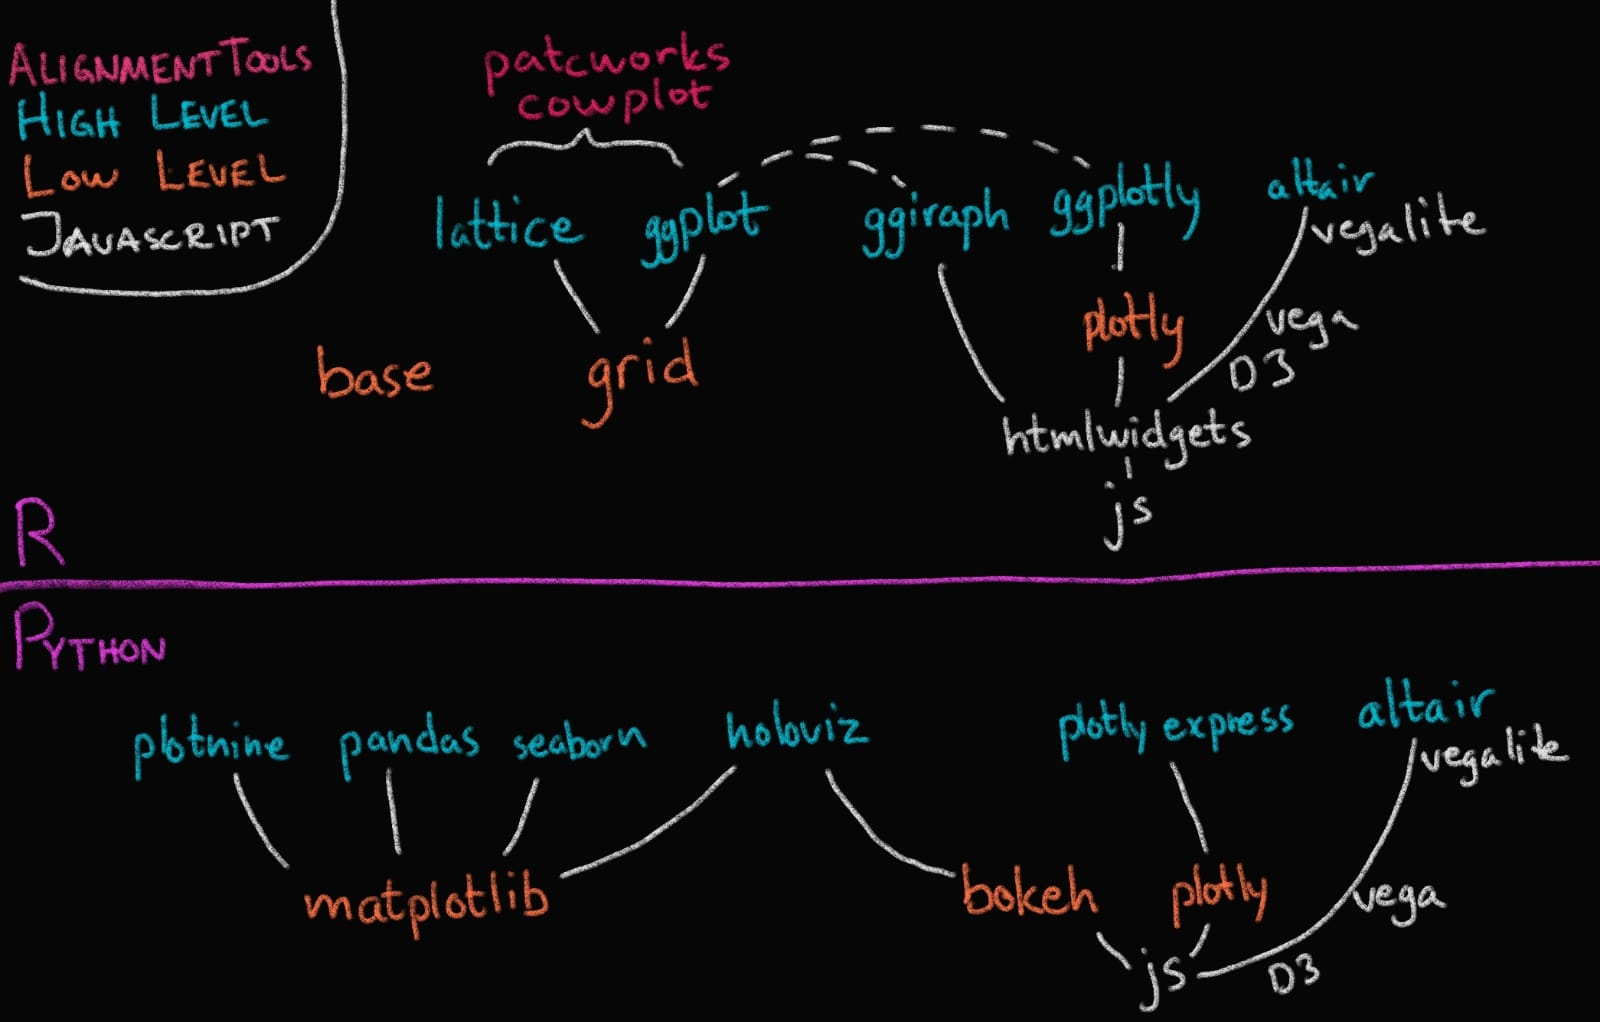 -->



![](img/r-py-plotting-landscapes.jpeg)

In this course we will focus on Altair and ggplot,
and as you can see in the image above,
these are both high level (or declarative) visualization libraries.

### High level declarative vs low level imperative visualization tools

**The text below is largely from the [University of Washington's Altair course](https://github.com/uwdata/visualization-curriculum)
(Copyright (c) 2019, University of Washington)
and has been restructured and modified
to fit the format of this course.**

By *declarative*,
we mean that you can provide a high-level specification of *what* you want the visualization to include, in terms of *data*, *graphical marks*, and *encoding channels*, rather than having to specify *how* to implement the visualization in terms of for-loops, low-level drawing commands, *etc*. For example, you would say "color my data by the column 'country'" instead of "go through this data frame and plot any observations of country1 in blue, any observations of country2 in red, etc".

Declarative visualization tools lets you think about **data and relationship**, rather than **plot construction details.** A key idea is that you declare links between data fields and visual encoding channels, such as the x-axis, y-axis, color, *etc*. The rest of the plot details are handled automatically. Building on this declarative plotting idea, a surprising range of simple to sophisticated visualizations can be created using a concise grammar.
Thanks to this functional way of interfaces with data, only minimal changes are required if the underlying data change or to change the type of plot.

This is an example of what plotting in an imperative library can look like (in this case matplotlib).
Don't worry about the specifics, but notice the general concept of for loops etc
(to be fair there are some newer features in matplotlib that try to borrow some high level syntax,
but the general concept is well conveyed here).

![](img/imperative-mpl.png)

A declarative library let's us talk in terms of our data instead
(again don't worry about the exact code, but see if you can understand the concept of the code and what we are plotting here):

![](img/declarative-altair.png)

(The examples above are from [this deepnote visualization intro tutorial](https://deepnote.com/@allan-campopiano/Intro-to-Altair-challenges-with-code-oiylaVDoSXu1a75xovuFRw))

In [ ]:
alt.Chart(data.iris()).mark_circle().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)

alt.Chart(...)

Two of the most prominent declarative statistical visualization libraries are [Altair](https://altair-viz.github.io/) (Python and R) and [ggplot](https://ggplot2.tidyverse.org/) (R but a Python clone called "plotnine" exists as well). These offer a powerful and concise visualization grammar for quickly building a wide range of statistical graphics. In brief, you first create a canvas/chart, then you encode your data variables as different dimensions in this chart (x, y, color, etc) and add geometric marks to represent the data (points, lines, etc). You can see an illustration of this in the image below, together with how `ggplot` (top) and `altair` (bottom) uses the grammatical components in its syntax. The exact syntax is slightly different, but the overall structure very much the same:

![](img/grammar-of-graphics.jpeg)

In the previous image of the plotting landscape,
you can see that there are other high level tools as well.
While these are also more convenient than low level tools,
their syntax is slightly different from Altair and ggplot,
and you express yourself more in terms of a topdown approach
starting with which plot to build,
rather than building the plot bottom up starting with the data
(e.g., you say `histogram(data, x, y, color)`,
instead of `canvas(data).mark_bar().encode(bin(x), y, color)`).
Both approaches have their advantages,
and building from small elements in grammar
is flexible and powerful which is why we focus on it in this course.
Finally, 
you can see that there are specific alignment tools
for putting ggplot figures together,
whereas this functionality is built into Altair.

There are many high level plotting libraries such as seaborn, plotly etc.
They all have their pros and cons: seaborn is very comprehensive whereas plotly and altair have interactive features that we will use later in the course.
For a detailed conceptual comparison of plotly and altair,
[you can read my answer here on SO](https://stackoverflow.com/a/66040502/2166823).

Enough talking,
let's code!

### Using a graphical grammar

#### Altair

Data in Altair and ggplot is built around ["tidy"](http://vita.had.co.nz/papers/tidy-data.html) dataframes,
which consists of a set of named data *columns*
with one feature each and rows with one observation each.
We will also regularly refer to data columns as data *fields*.
We will start by discussing Altair
for which we will often use datasets
from the [vega-datasets](https://github.com/vega/vega-datasets) repository.
Some of these datasets are directly available as Pandas data frames:

:::{margin} Factual tidbit

The "gg" in ggplot is a reference to the book "Grammar of Graphics",
which inspired the creation of the ggplot library.

Altair is the name of a star in the same constellation as the star Vega,
which is also the name of the Javascript library that Altair is built upon.

![](https://upload.wikimedia.org/wikipedia/commons/6/69/Altair.jpg)

:::

In [ ]:
import altair as alt
from vega_datasets import data


url = 'https://raw.githubusercontent.com/joelostblom/teaching-datasets/main/cars.csv'
cars = pd.read_csv(url, parse_dates=['Year'])
cars

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,Eight,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,Eight,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,Eight,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,Eight,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,Eight,302.0,140.0,3449,10.5,1970-01-01,USA
...,...,...,...,...,...,...,...,...,...
394,ford mustang gl,27.0,Four,140.0,86.0,2790,15.6,1982-01-01,USA
395,vw pickup,44.0,Four,97.0,52.0,2130,24.6,1982-01-01,Europe
396,dodge rampage,32.0,Four,135.0,84.0,2295,11.6,1982-01-01,USA
397,ford ranger,28.0,Four,120.0,79.0,2625,18.6,1982-01-01,USA


Datasets in the vega-datasets collection can also be accessed via URLs. For more information about data frames - and some useful transformations to prepare Pandas data frames for plotting with Altair! - see the [Specifying Data with Altair documentation](https://altair-viz.github.io/user_guide/data.html).

The fundamental object in Altair is the `Chart`, which takes a data frame as a single argument `alt.Chart(cars)`.

With a chart object in hand, we can now specify how we would like the data to be visualized. We first indicate what kind of geometric *mark* we want to use to represent the data. We can set the `mark` attribute of the chart object using the the `Chart.mark_*` methods.

For example, we can show the data as a point using `mark_point()`:

In [ ]:
alt.Chart(cars).mark_point()

alt.Chart(...)

Here the rendering consists of one point per row in the dataset, all plotted on top of each other, since we have not yet specified positions for these points.

To visually separate the points, we can map various *encoding channels*, or *channels* for short, to fields in the dataset. For example, we could *encode* the field `Miles_per_Gallon` of the data using the `x` channel, which represents the x-axis position of the points. To specify this, use the `encode` method:

In [ ]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon'
)

alt.Chart(...)

The `encode()` method builds a key-value mapping between encoding channels (such as `x`, `y`, `color`, `shape`, `size`, *etc.*) to fields in the dataset, accessed by field name. For Pandas data frames, Altair automatically determines an appropriate data type for the mapped column, which in this case is the *nominal* type, indicating unordered, categorical values.

You can also see that there are there is a button with three dots
to the top right.
If you click this you will have options to save the chart
and to open the underlying Vega-Lite code.

Though we've now separated the data by one attribute, we still have multiple points overlapping within each category. Let's further separate these by adding a `y` encoding channel;
for example lets say we wanted to answer the question:
"How is a cars fuel efficiency related to its horsepower?"

In [ ]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower'
)

alt.Chart(...)

Here we can see that there seems to be a negative correlation with Horsepower and Miles_per_Gallon:
More powerful cars consume more gas.

But there might be other variables that also influence this relationship,
e.g. the weight of the car probably matters for fuel efficiency,
since more force is needed to propel a bigger mass.
We can add more dimensions to this chart,
e.g. specifying which column we want to color the points by
and Altair will automatically figure out an appropriate colorscale to use.

In [ ]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Weight_in_lbs'
)

alt.Chart(...)

Aha! Here we can see that weight is also correlated with Horsepower (positively)
and Miles_per_Gallon (negatively).
We can't say anything about causation from the plot alone,
just correlation.

Since we used a column with numerical (called "quantitative") data,
a continuous, Altair automatically picked a gradually increasing colorscale for us.
If we instead choose a color with categorical (called "nominal") data,
Altair will smartly pick a suitable colorscale with distinct colors
without us having to tell it which specific color to use
for each value in the `Cylinders` (engine size) column.

In [ ]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Cylinders'
)

alt.Chart(...)

Do you think it is still correct to say that there is a relationship between `Horsepower` and `Miles_per_Gallon`?
Is it also true for engines of the same sizes?

We can encode shapes aesthetics the same way as color,
this can make it easier to distinguish the groups.

In [ ]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Cylinders',
    shape='Cylinders'
)

alt.Chart(...)

Another common encoding aesthetic is `size`.

In [ ]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Cylinders',
    shape='Cylinders',
    size='Weight_in_lbs'
)

alt.Chart(...)

This plot is quite messy,
there are too many things going on to be able to see the variation in weight.
If you scroll up to the plot where we encoded weight in the color channel,
you can see that the plot is much clearer.
There is plenty of research on which channels are best for what features,
which we will learn more about next lecture.

One of the really neat things with Altair is that it extends its grammar 
to interactive plot elements as well.
We will see much more of this in DSCI 532,
but 531 will give you at least a peak of some of these features.
Let's add a tooltip to each data point with the name of the car,
hover over the data points to see the tooltip show up!

In [ ]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Cylinders',
    tooltip='Name'
)

alt.Chart(...)

#### ggplot

In [ ]:
# Note that rpy2 might have issues if there is a system installation of R shadowing the conda installation
# Weirdly it seems that is picks up and conda r packages correctly,
# but tries to use base R from the system so if there are conflicting version of base R and the conad r packages things don't work
# Solution: Only have R installed in the conda env, remove the system version

In [ ]:
# Load the ipython extension that provides the %%R cell magic
# which allows R and Python to be run in the same notebook
%load_ext rpy2.ipython

In [ ]:
%%R
# The line above is the "R" cell magic, which mean we can write R code in this cell
library(tidyverse)
theme_set(theme_gray(base_size = 14))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


`ggplot` has a similar grammar of graphics as Altair.
The base canvas can be created with `ggplot`
and is analogous to the `Chart` in Altair.
We can make this canvas aware of the data we are plotting like so
`ggplot(cars, aes(x = Miles_per_Gallon, y = Horsepower))`
and finally add geoms (marks) to it like in the code cell below.

Rows: 399 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): Name, Cylinders, Origin
dbl  (5): Miles_per_Gallon, Displacement, Horsepower, Weight_in_lbs, Acceler...
date (1): Year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


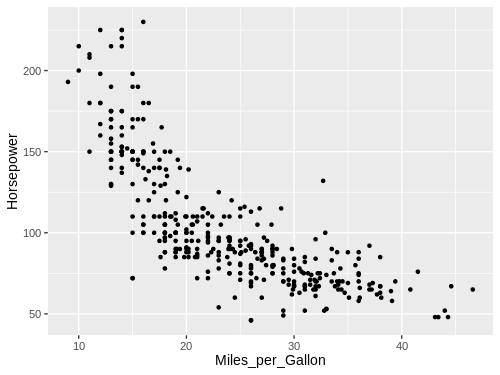

In [ ]:
%%R -w 500 -h 375
# The options set the plot size when using the %%R magic,
# you can do the following for the same effect in an R kernel:
# options(repr.plot.width=7, repr.plot.height=5)

url = 'https://raw.githubusercontent.com/joelostblom/teaching-datasets/main/cars.csv'
cars = read_csv(url)

ggplot(cars, aes(x = Miles_per_Gallon, y = Horsepower)) +
    geom_point()

The default ggplot style is quite different from that of Altair.
Both have advantages,
and they are easy to customize to look however you want,
which we will also get into later.
Note that ggplot does not including the origin of the plot (x=0, y=0) by default,
but Altair does for many cases.

Let's encode the same aesthetics as for Altair,
and see how the syntax differs

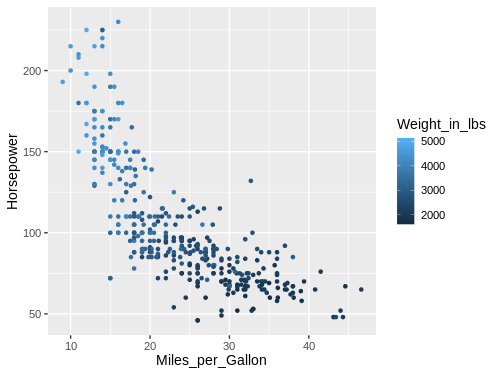

In [ ]:
%%R -w 500 -h 375 
# Since `cars` is now already a defined varible in the R kernel, we don't need `-i` again

ggplot(cars, aes(x = Miles_per_Gallon, y = Horsepower, color = Weight_in_lbs)) +
    geom_point()

As with Altair,
ggplot chooses an appropriate continuous color scale for the quantitative data,
although it start from dark instead of light,
which could be related to the different choice of background color.
Notice also the difference in how the legend is added,
in Altair the overall width of the figure was increased,
whereas here the legend takes part of the figure width from the canvas,
which is made narrower.

When changing to a nominal feature,
the colorscale changes to a discrete one instead of continuous.
You can see in these two plots
that ggplot uses different colorscales from Altair;
we will talk more about these default choices and how to change them in a later lecture.

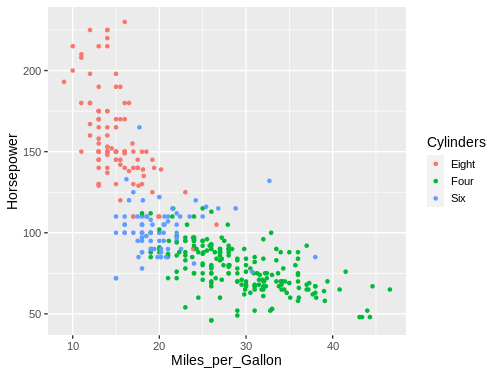

In [ ]:
%%R -w 500 -h 375
ggplot(cars, aes(x = Miles_per_Gallon, y = Horsepower, color = Cylinders)) +
    geom_point()

Shape can be encoded like before

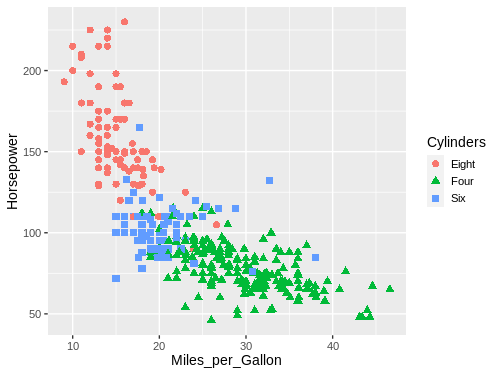

In [ ]:
%%R -w 500 -h 375
ggplot(cars, aes(x = Miles_per_Gallon, y = Horsepower, color = Cylinders, shape = Cylinders)) +
    geom_point(size=3)

And also size.

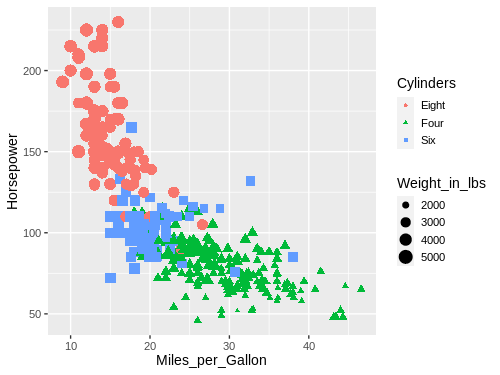

In [ ]:
%%R -w 500 -h 375
ggplot(cars, aes(x = Miles_per_Gallon, y = Horsepower, color = Cylinders,
                 shape = Cylinders, size = Weight_in_lbs)) +
    geom_point()

### Line charts and data aggregations

#### Altair

Let's try to visualize a relationship with a trend,
such a co2 concentration over time.

In [ ]:
url = 'https://raw.githubusercontent.com/joelostblom/teaching-datasets/main/co2_concentrations.csv'
co2 = pd.read_csv(url, parse_dates=['date'])
co2

,concentration,date
0,5.42,1959-01-01 00:00:00+00:00
1,6.31,1959-01-31 10:00:00+00:00
2,6.50,1959-03-02 20:00:00+00:00
3,7.56,1959-04-02 06:00:00+00:00
4,8.13,1959-05-02 16:00:00+00:00
...,...,...
463,52.57,1997-08-01 22:00:00+00:00
464,50.24,1997-09-01 08:00:00+00:00
465,50.83,1997-10-01 18:00:00+00:00
466,52.49,1997-11-01 04:00:00+00:00


In [ ]:
alt.Chart(co2).mark_point().encode(
    x='date',
    y='concentration'
)

alt.Chart(...)

While we can see that this chart looks a bit messy due to the many points,
but it is still possible to see an overall positive trend.
If we switch to a line chart,
we can also see minor fluctuations in the trend
sine the lines are connected in the the same order they occur on the date axis.
This makes it easier for our eye to detect the oscillating pattern.

In [ ]:
alt.Chart(co2).mark_line().encode(
    x='date',
    y='concentration'
)

alt.Chart(...)

What happens if we try to to visualize 
how the miles per gallon has changes over the years
in our cars data set?
First with points:

In [ ]:
alt.Chart(cars).mark_point().encode(
    x='Year',
    y='Miles_per_Gallon')

alt.Chart(...)

It looks a bit odd, let's try a line:

In [ ]:
alt.Chart(cars).mark_line().encode(
    x='Year',
    y='Miles_per_Gallon')

alt.Chart(...)

Oh oh, something is wrong.
Because there are multiple values per year,
the line goes between all of them vertically and it just looks really odd.
Instead,
what we want is to aggregate the data,
and show for example how the mean has changed over time
so that there is one point per year.
We could wrangle the data manually.

In [ ]:
yearly_avg_gallons = cars.groupby('Year')['Miles_per_Gallon'].mean().reset_index()
yearly_avg_gallons

,Year,Miles_per_Gallon
0,1970-01-01,17.689655
1,1971-01-01,21.250000
2,1972-01-01,18.703704
3,1973-01-01,17.076923
4,1974-01-01,22.703704
5,1975-01-01,20.266667
6,1976-01-01,21.573529
7,1977-01-01,23.444444
8,1978-01-01,24.168571
9,1979-01-01,25.082143


And then plot the wrangled dataframe.

In [ ]:
alt.Chart(yearly_avg_gallons).mark_line().encode(
    x='Year',
    y='Miles_per_Gallon')

alt.Chart(...)

But instead of doing this two step process with pandas,
we could aggregate right inside Altair!
To get the mean of a column,
wrap it in a string that says `'mean()'`:

In [ ]:
alt.Chart(cars).mark_line().encode(
    x='Year',
    y='mean(Miles_per_Gallon)')

alt.Chart(...)

That is a convenient short cut!
We can see here that Altair automatically changes the axis label for us
to reflect the aggregation
that we have performed on the data,
here taking the "mean" of the fuelage.
Many common aggregations/transformations are available via this syntax,
[more info in the documentation including a table with all available aggregations](https://altair-viz.github.io/user_guide/encoding.html#binning-and-aggregation).

What happens if we add a splash of `color`?

In [ ]:
alt.Chart(cars).mark_line().encode(
    x='Year',
    y='mean(Miles_per_Gallon)',
    color='Origin')

alt.Chart(...)

Now we got three lines!
Just like with a pandas `groupby()` operation,
Altair understands that we want to take the mean of each group
in the color channel separately.

Note that line charts are intended to be used over a continuous axis
like a quantity or a date.
It is rarely appropriate to connect categorical values with a line,
since the interpolation of the lines between the categories is nonsensical,
e.g. what does it mean that the value of the line is around 25 right between USA and Japan
in the chart below?

In [ ]:
alt.Chart(cars).mark_line().encode(
    x='Origin',
    y='mean(Miles_per_Gallon)')

alt.Chart(...)

Ok let's see how this looks with ggplot.
First the dots...

#### ggplot

Rows: 468 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (1): concentration
dttm (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


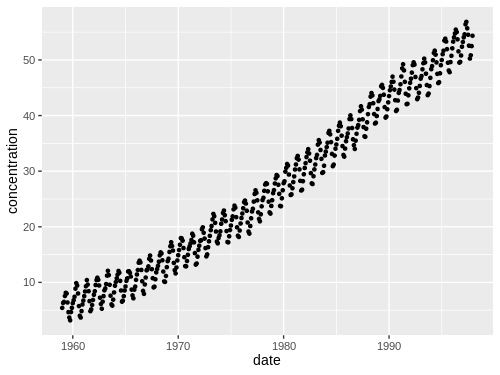

In [ ]:
%%R -w 500 -h 375

url = 'https://raw.githubusercontent.com/joelostblom/teaching-datasets/main/co2_concentrations.csv'
co2 = read_csv(url)

ggplot(co2, aes(x = date, y = concentration)) +
    geom_point()

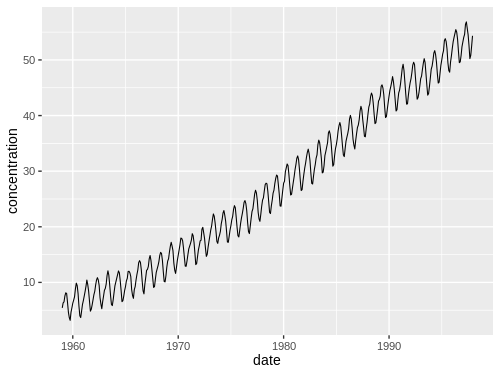

In [ ]:
%%R -w 500 -h 375

ggplot(co2, aes(x = date, y = concentration)) +
    geom_line()

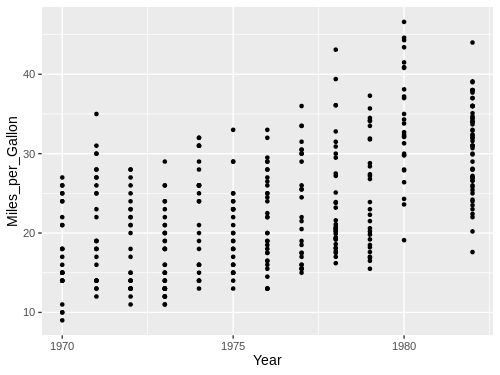

In [ ]:
%%R -w 500 -h 375
ggplot(cars, aes(x = Year, y = Miles_per_Gallon)) +
    geom_point()

Then we get the same issue with the lines:

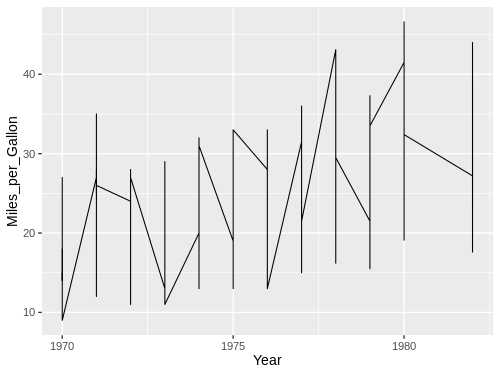

In [ ]:
%%R -w 500 -h 375
ggplot(cars, aes(x = Year, y = Miles_per_Gallon)) +
    geom_line()

We could wrangle the data here as well.

In [ ]:
%%R -w 500 -h 375
yearly_avg_gallons <- cars %>% 
    group_by(Year) %>%
    summarize(Miles_per_Gallon = mean(Miles_per_Gallon, na.rm = TRUE))
yearly_avg_gallons

# A tibble: 12 × 2
   Year       Miles_per_Gallon
   <date>                <dbl>
 1 1970-01-01             17.7
 2 1971-01-01             21.2
 3 1972-01-01             18.7
 4 1973-01-01             17.1
 5 1974-01-01             22.7
 6 1975-01-01             20.3
 7 1976-01-01             21.6
 8 1977-01-01             23.4
 9 1978-01-01             24.2
10 1979-01-01             25.1
11 1980-01-01             34.0
12 1982-01-01             31.0


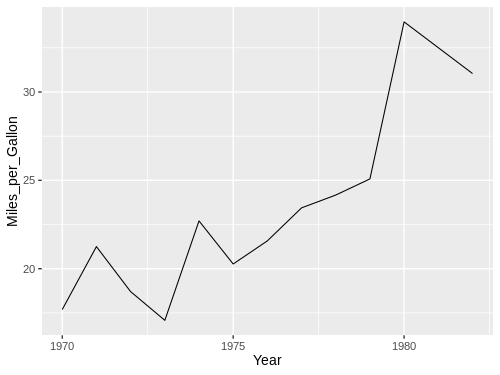

In [ ]:
%%R -w 500 -h 375
ggplot(yearly_avg_gallons, aes(x = Year, y = Miles_per_Gallon)) +
    geom_line()

But like in Altair,
there is a shortcut.
We can tell `geom_line` to show a summary of the points instead of all of them.
We then also needs to specify which kind of summary,
which in this case is the mean.

R[write to console]: No summary function supplied, defaulting to `mean_se()`



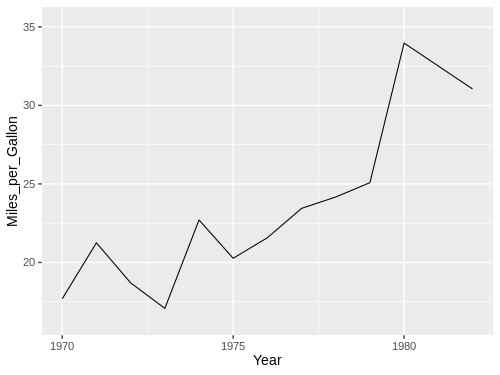

In [ ]:
%%R -w 500 -h 375
ggplot(cars, aes(x = Year, y = Miles_per_Gallon)) +
    geom_line(stat = 'summary')

When we don't specify any explicit value to `stat`,
the default is `'identity'`,
which you can think of as "show the exact identity/value for each data point,
don't summarize them".

Another way to write this in ggplot,
is using the `stat_summary` function instead of the `geom_line` function.

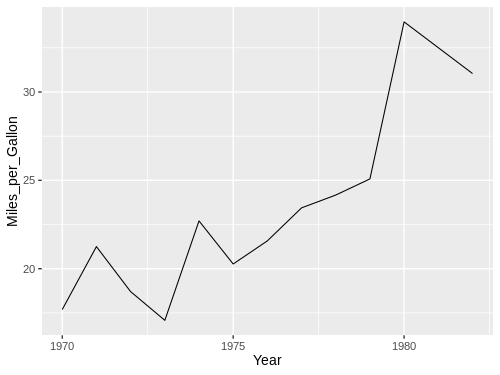

In [ ]:
%%R -w 500 -h 375
ggplot(cars, aes(x = Year, y = Miles_per_Gallon)) +
    stat_summary(geom = "line", fun = mean)

These two approaches are **identical** in terms of functionality,
but you will see both when you search for help online,
so it is good to be aware of both.
Personally, 
I like the `geom_` approach
since that means we are always using the same function for plotting data,
regardless of whether we are plotting the raw identity value, or summaries.
This makes the visual appearance of the code cleaner and easier to read,
but you are free to use either.
[This is a nice SO answer if you want to know more](https://stackoverflow.com/questions/38775661/what-is-the-difference-between-geoms-and-stats-in-ggplot2/44226841#44226841).

By using the `color` parameter,
`ggplot` can group lines according to unique values in a column in the dataframe
and summarize them once per group,
just like in Altair.

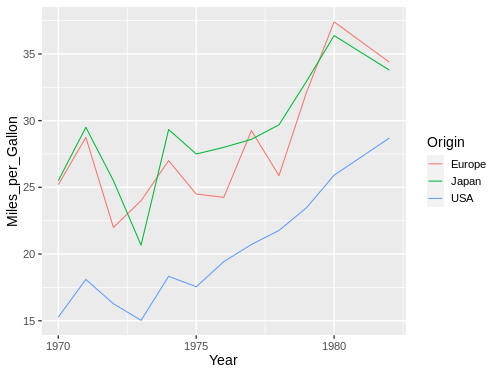

In [ ]:
%%R -w 500 -h 375
ggplot(cars, aes(x = Year, y = Miles_per_Gallon, color = Origin)) +
    geom_line(stat = 'summary', fun = mean)

We don't have to write `fun = `, but we get a warning if we are note explicit
about which summary function we want to use
(the plot is the same since the mean is the default).

R[write to console]: No summary function supplied, defaulting to `mean_se()`



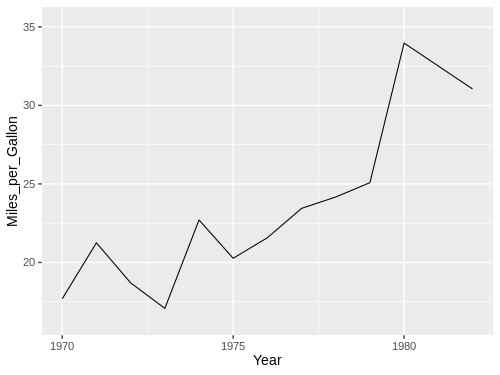

In [ ]:
%%R -w 500 -h 375
ggplot(cars, aes(x = Year, y = Miles_per_Gallon)) +
    geom_line(stat = 'summary')

### Combining marks / geoms in the same plot

#### Altair

As we've seen above, the Altair `Chart` object represents a plot with a single mark type. What about more complicated diagrams, involving multiple charts or layers? Using a set of *view composition* operators, Altair can take multiple chart definitions and combine them to create more complex views.

To augment this plot, we might like to add `point` marks for each averaged data point.
We can start by defining each chart separately: first a line plot, then a scatter plot. We can then use the `layer` operator to combine the two into a layered chart. Here we use the shorthand `+` (plus) operator to invoke layering:

In [ ]:
line = alt.Chart(cars).mark_line().encode(
    x='Year',
    y='mean(Miles_per_Gallon)')

point = alt.Chart(cars).mark_point().encode(
    x='Year',
    y='mean(Miles_per_Gallon)')

line + point

alt.LayerChart(...)

We can also create this chart by *reusing* and *modifying* a previous chart definition! Rather than completely re-write a chart, we can start with the line chart, then invoke the `mark_point` method to generate a new chart definition with a different mark type:

In [ ]:
line = alt.Chart(cars).mark_line().encode(
    x='Year',
    y='mean(Miles_per_Gallon)')

line + line.mark_point()

alt.LayerChart(...)

Could also have done `mark_line(point=True)`,
but only a special case here so not generally useful.
Can also layer with non averaged values.

In [ ]:
line = alt.Chart(cars).mark_line().encode(
    x='Year',
    y='mean(Miles_per_Gallon)')

line + line.mark_point().encode(y='Miles_per_Gallon')

alt.LayerChart(...)

But note that the axis now has two labels,
we will see how to change that next lecture.
Adding color works as expected with layers.

In [ ]:
line = alt.Chart(cars).mark_line().encode(
    x='Year',
    y='mean(Miles_per_Gallon)',
    color='Origin')

line + line.mark_point().encode(y='Miles_per_Gallon')

alt.LayerChart(...)

In [ ]:
line = alt.Chart(cars).mark_line().encode(
    x='Year',
    y='mean(Miles_per_Gallon)',
    color='Origin')

line + line.mark_point().encode()

alt.LayerChart(...)

#### ggplot

We could do it similarly as in Altair,
by first saving to a variable and then adding the second geom.

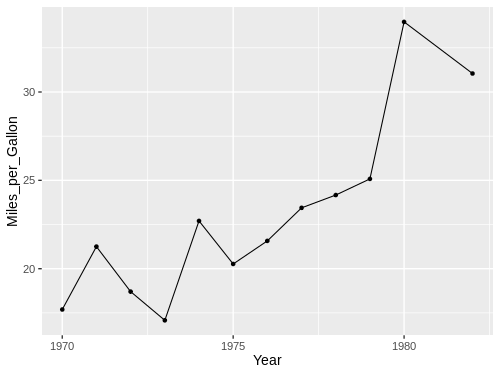

In [ ]:
%%R -w 500 -h 375
line <- ggplot(cars, aes(x = Year, y = Miles_per_Gallon)) +
    geom_line(stat = 'summary', fun = mean)
line + geom_point(stat = 'summary', fun = mean)

Or adding the second geom in the original plotting call.

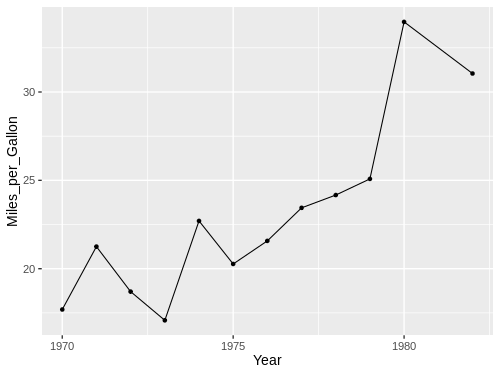

In [ ]:
%%R -w 500 -h 375
ggplot(cars, aes(x = Year, y = Miles_per_Gallon)) +
    geom_line(stat = 'summary', fun = mean) + 
    geom_point(stat = 'summary', fun = mean)

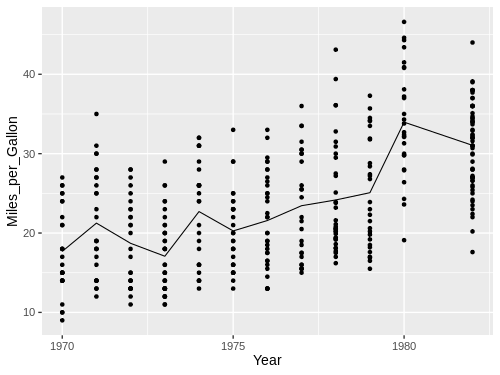

In [ ]:
%%R -w 500 -h 375
ggplot(cars, aes(x = Year, y = Miles_per_Gallon)) +
    geom_line(stat = 'summary', fun = mean) + 
    geom_point()

Here we get only a singly axis label,
so we don't need to worry about changing it.

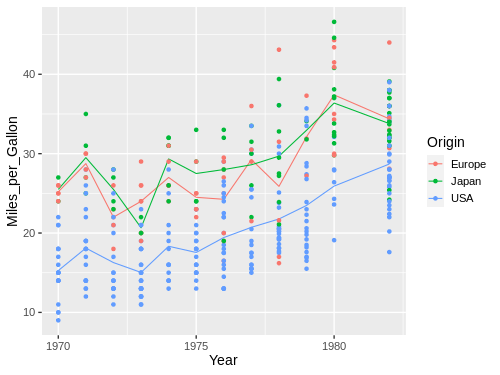

In [ ]:
%%R -w 500 -h 375
ggplot(cars, aes(x = Year, y = Miles_per_Gallon, color=Origin)) +
    geom_line(stat = 'summary', fun = mean) + 
    geom_point()

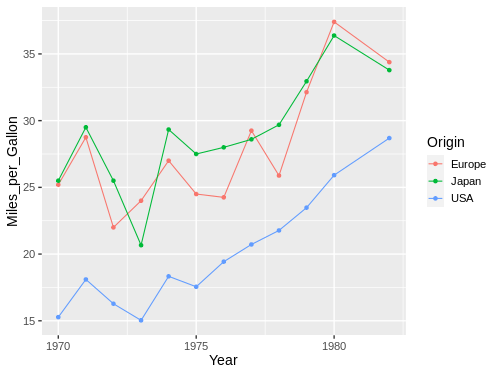

In [ ]:
%%R -w 500 -h 375
ggplot(cars, aes(x = Year, y = Miles_per_Gallon, color=Origin)) +
    geom_line(stat = 'summary', fun = mean) + 
    geom_point(stat = 'summary', fun = mean)

### Aggregating on both x and y

#### Altair

Let's have a look at a scatter plot with 
the fuel efficiency on the x-axis 
and the weight on the y-axis.

In [ ]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Weight_in_lbs',
    color='Origin')

alt.Chart(...)

Note that it appears that cars differ
in their weight and mileage
based on their country of origin.
At least the American cars appear to stand out,
but it is difficult to see any differences
between Europe and Japan.

If we were interested if the average difference between the countries
we would need to summarize/aggregate both the x and y values
for all points with the same color.
This works as expected in Altair
by using `mean()` when encoding both the x and y variables.

In [ ]:
alt.Chart(cars).mark_point().encode(
    x='mean(Miles_per_Gallon)',
    y='mean(Weight_in_lbs)',
    color='Origin')

alt.Chart(...)

In this visualization of the aggregated data,
we can detect small differences
between the means of the Japanese and Europeans cars,
which was not discernible when we plotted all the points.
Whether this difference is big enough to reach a different conclusion
than when inspecting the previous plots
depends on our application and the purpose of the data exploration.

#### ggplot

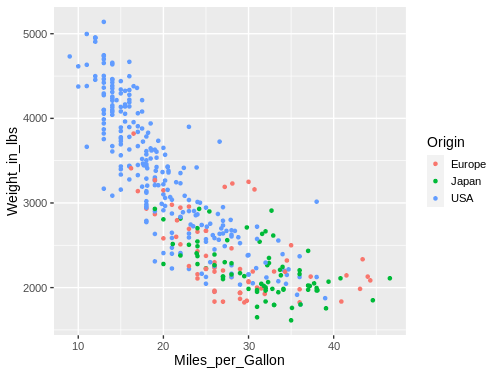

In [ ]:
%%R -w 500 -h 375
ggplot(cars, aes(x = Miles_per_Gallon, y = Weight_in_lbs, color = Origin)) +
    geom_point()

If we apply the same logic here as in Altair,
we will not quite get what we want.

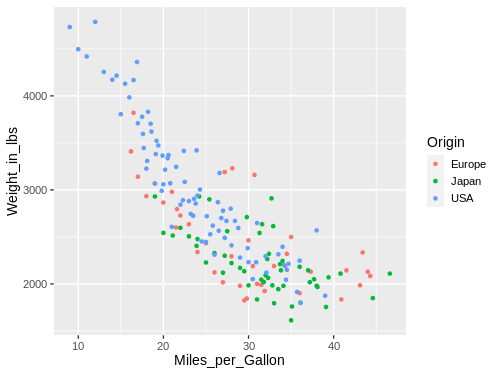

In [ ]:
%%R -w 500 -h 375
ggplot(cars, aes(x = Miles_per_Gallon, y = Weight_in_lbs, color = Origin)) +
    geom_point(stat = 'summary', fun = mean)

What happens here is that ggplot is summarizing the y-values
for all the points with the same x-value and the same color value.
This worked well when we were plotting the change over time
in the line plot above (since we wanted to group by year and origin),
but in this case we want both the x and y value to be summarized
for all the points with the same color.
To achieve this in ggplot,
we must instead first transform the data using dplyr.

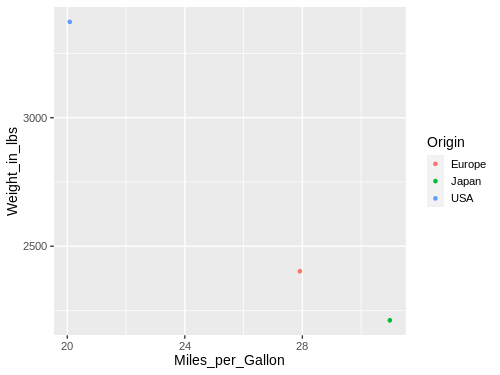

In [ ]:
%%R -w 500 -h 375
cars |>
    group_by(Origin) |>
    summarize(
        Miles_per_Gallon = mean(Miles_per_Gallon, na.rm = TRUE),
        Weight_in_lbs = mean(Weight_in_lbs, na.rm = TRUE)) |>
    ggplot(aes(x = Miles_per_Gallon, y = Weight_in_lbs, color = Origin)) +
        geom_point()